In [1]:
import numpy as np
from astropy.io import fits
import Functions
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
import pymaster as nmt
import pysap

In [2]:
hudl = fits.open('ICM_old/data/map2048_MILCA_Coma_20deg_G.fits')
data = hudl[1].data
hudl1 = fits.open('Coma_ymap.fits')
data1 = hudl1[1].data
norm_y_fluc = np.loadtxt('ICM_old/data/normalised_y_fluc.txt')
norm_y_fluc_gaussianblur = np.loadtxt('data/normalised_y_fluc_gaussianblur.txt')


In [3]:
y_fluc_ellipse, y_fluc_norm_ellipse, y_smooth_ellipse = Functions.get_fluctuations_ellipse(data, [352.42445296,349.85768166 ,1,0], 1.7177432059, 700, 700, 240)
y_fluc_gaussian, y_fluc_norm_gaussian, y_smooth_gaussian = Functions.get_fluctuations_gaussian(data, 5)
y_fluc_wavelet, y_fluc_norm_wavelet, y_smooth_wavelet = Functions.get_fluctuations_wavelet(data, 1,)

AttributeError: 'int' object has no attribute 'all'

In [4]:
Functions.plot_y_fluc(data1)
Functions.plot_y_fluc(y_fluc_gaussian[279:419,282:422])
Functions.plot_y_fluc(y_fluc_wavelet[279:419,282:422])
Functions.plot_y_fluc(y_fluc_norm_ellipse)
Functions.plot_y_fluc(y_fluc_norm_gaussian[279:419,282:422])
Functions.plot_y_fluc(y_fluc_norm_wavelet[279:419,282:422])
plt.imshow(y_fluc_norm_wavelet[279:419,282:422],vmin=np.min(y_fluc_norm_gaussian[279:419,282:422]),vmax=np.max(y_fluc_norm_gaussian[279:419,282:422]))

ValueError: vmin, vcenter, and vmax must be in ascending order

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(y_smooth_ellipse[0,70:])

In [ ]:
plt.imshow(y_smooth_gaussian[279:419,282:422])

In [ ]:
#plt.imshow(y_smooth_wavelet[279:419,282:422])
temp = (y_smooth_wavelet - y_smooth_gaussian)
plt.imshow(temp[279:419,282:422])
#plt.hist(temp.flatten(),bins=64)
print(np.min(temp[279:419,282:422]))
print(np.max(temp[279:419,282:422]))

In [ ]:
#g_amp, g_std_amp, g_cl00_uncoupled, g_covar, g_ells_uncoupled = Functions.namaster_spectrum(y_fluc_norm_gaussian, 6, 500, 2000, 27.052, 1.7177432059, 15, 60)

amp, std_amp, cl00_uncoupled, covar, ells_uncoupled = Functions.namaster_spectrum(y_fluc_gaussian[279:419,282:422], 6, 500, 2000, 27.052, 1.7177432059, 15, 60)
plt.figure()
plt.xscale('log')
lambdas_inv = ells_uncoupled/(27.052*60*180)
#plt.plot(lambdas_inv, amp*1000000, 'r.', label='Amplitude of power spectrum')
plt.errorbar(lambdas_inv,amp*1000000, yerr=std_amp*1000000, fmt='b.',ecolor='black',elinewidth=1,capsize = 4,label='Amplitude of power spectrum')
#plt.plot(lambdas_inv_curve, curve, 'b', 
#          label='Best fit: Power law (power = %1.2f)'%p_fit)
plt.errorbar((0.000461089,0.00056334,0.000717526,0.000974452,0.001333839,0.001846432),(2.89673913,3.336956522,3.798913043,4.027173913,3.586956522,2.934782609),yerr=([0.380434783,0.434782609,0.505434783,0.586956522,0.679347826,0.657608696],[0.380434783,0.440217391,0.505434783,0.592391304,0.684782609,0.663043478]), fmt='r.',ecolor='black',elinewidth=1,capsize = 4)

plt.xlabel("$1/\lambda$ ($kpc^{-1}$)")
plt.ylabel("Amplitude of power spectrum")
plt.legend()
plt.title("Power Spectrum of map")
plt.show()

In [ ]:
Ns = np.loadtxt("ICM_old/data/Ns.txt")
amp_pressure = np.zeros((1500,6))
Functions.plot_pressure_spectrum(ells_uncoupled, cl00_uncoupled, Ns, amp_pressure, 27.052, std_amp)

In [ ]:
plt.figure()
plt.loglog(Functions.radial_profile(y_smooth_gaussian[279:419,282:422],[70,70]))
radialmean, radialstd = Functions.radial_profilestat(y_smooth_gaussian[279:419,282:422],[70,70])
print(np.shape(radialmean[0]))
plt.loglog(radialmean[0])
plt.fill_between((radialmean[1][:-1]+radialmean[1][1:])/2, radialmean[0]+radialstd[0]/2,radialmean[0]-radialstd[0]/2)

#plt.loglog(Functions.radial_profile(y_smooth_gaussian[279:419,282:422],[70,70]))
#plt.loglog(Functions.radial_profile(y_smooth_wavelet,[70,70]))
plt.show()

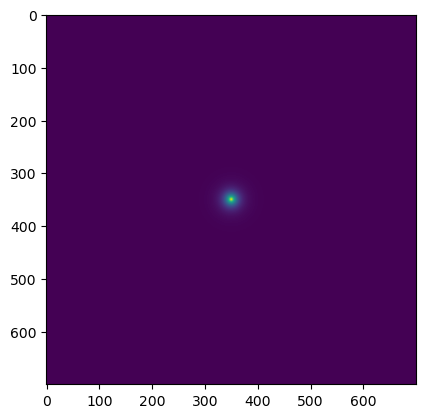

In [5]:
plt.imshow(data1)